In [63]:
import numpy as np
import matplotlib.pyplot as plt
import cv2, os 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix


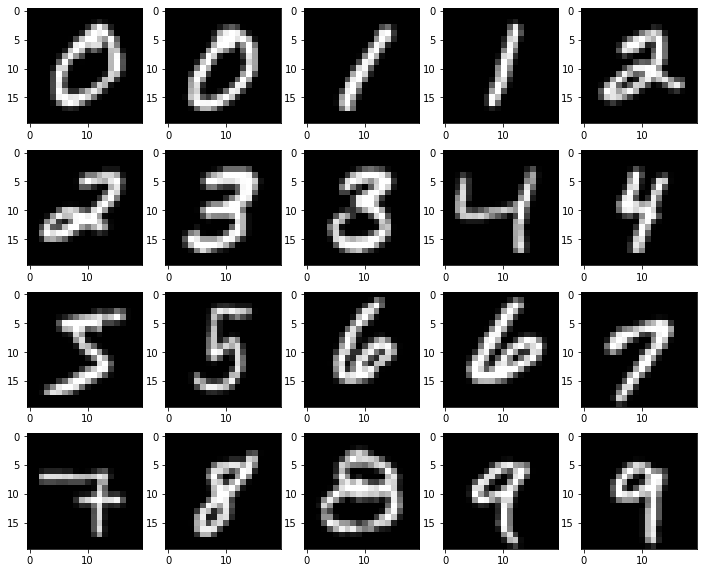

In [71]:
def read_digits_image(file, digits_per_class):
    '''Lê e processa imagem contendo 5000 dígitos. Retorna uma lista contendo 
    as imagens de dígitos separadas'''

    original_img = plt.imread(file)
    digit_size = 20                 # Número de linhas e colunas das imagens de cada dígito

    # Obtém número de dígitos nas linhas e colunas da imagem original
    num_rows, num_cols = original_img.shape
    num_rows_digits = num_rows//digit_size
    num_cols_digits = num_cols//digit_size

    # Gera lista de imagens contendo os dígitos separados da imagem lida acima
    all_digit_images = []
    for i in range(num_rows_digits):
        for j in range(num_cols_digits):
            digit_img = original_img[i*digit_size:(i+1)*digit_size, 
                                     j*digit_size:(j+1)*digit_size]
            all_digit_images.append(digit_img)
    
    return all_digit_images
            
digits_per_class = 500
num_classes = 10
all_digit_images = read_digits_image('digits.png', digits_per_class)
    
# Mostra 2 dígitos de cada classe
k = 0
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(all_digit_images[k], 'gray')
    k += digits_per_class//2
_ = plt.savefig('numbers.png' );

In [65]:
# Implementacao do metodo
def lbp_histogram(img):
  num_rows, num_cols = img.shape 
  nei_list = [(-1, 0), (-1, 1), (0, 1), (1, 1), 
              (1, 0), (1, -1), (0, -1), (-1,-1)]
  
  # imagem que armazenara os valores dos calculos
  img_lbp = np.zeros_like(img) 
  for row in range(1, num_rows-1): 
      for col in range(1, num_cols-1):
        
        # separando os vizinhos
          neighbours = []
          non_null_neighbours = 0                         
          for nei_index in nei_list:
            # contagem de vizinhos não nulos
            if img[row + nei_index[0]][col + nei_index[1]] >= img[row][col]:
              neighbours.append(1)
            else:
              neighbours.append(0)
              
          #Convertendo o vetor binário para decimal
            zeros_ones = np.where(neighbours)[0]
            if len(zeros_ones) >= 1:
                num = np.sum(2**zeros_ones)
            else:
                num = 0
            img_lbp[row][col] = num
            
  # retorna o histograma da imagem resultante do método
  hist = np.histogram(img_lbp[1:-1, 1:-1].flatten(), bins=256)[0]
  return  hist

In [66]:
# Divide conjunto de dados em treinamento e teste
split_amount = digits_per_class//2
train_imgs = []
test_imgs = []
for i in range(num_classes):
    class_images = all_digit_images[i*digits_per_class:(i+1)*digits_per_class]
    train_imgs.extend(class_images[:split_amount])
    test_imgs.extend(class_images[split_amount:])
    
# Define o índice da classe para cada imagem
labels = []
for class_index in range(num_classes):
    labels.extend([class_index]*(digits_per_class//2))
labels = np.array(labels)

In [67]:
# Extraindo os histogramas das imagens de treino
train_data = []
test_data = []
for img in train_imgs:
  train_data.append(lbp_histogram(img))
  
for img in test_imgs:
  test_data.append(lbp_histogram(img))

In [68]:
# K-Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, labels)
knn_result = knn.predict(test_data)

In [69]:
# Calculando as métricas da classificao realizada
metrics = classification_report(knn_result, labels, output_dict= False)
print(metrics)

              precision    recall  f1-score   support

           0       0.82      0.55      0.66       376
           1       0.95      0.95      0.95       251
           2       0.47      0.35      0.40       333
           3       0.67      0.57      0.61       294
           4       0.65      0.69      0.67       234
           5       0.52      0.57      0.54       228
           6       0.44      0.57      0.50       193
           7       0.58      0.81      0.68       180
           8       0.54      0.71      0.62       191
           9       0.58      0.66      0.62       220

    accuracy                           0.62      2500
   macro avg       0.62      0.64      0.62      2500
weighted avg       0.64      0.62      0.62      2500



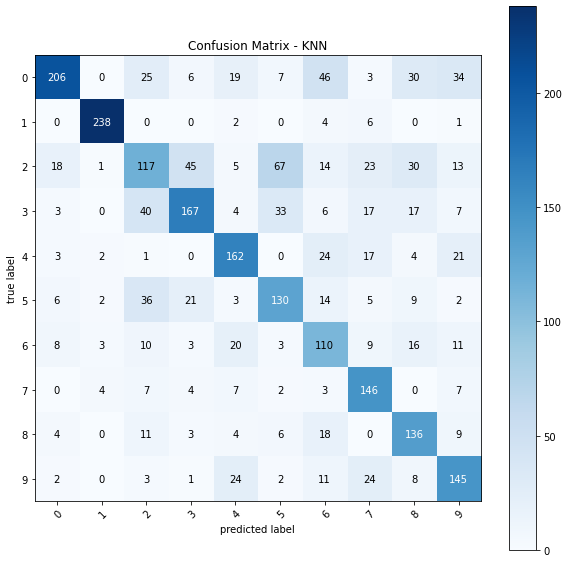

In [70]:
# Plotando a matriz de confusão resultante da classificacao
c_matrix = confusion_matrix(knn_result, labels)
class_names = range(10)
fig, ax = plot_confusion_matrix(conf_mat=c_matrix,
                                show_absolute=True,
                                colorbar=True, 
                                class_names=class_names, 
                                figsize=(10, 10));

plt.title('Confusion Matrix - KNN')
_ = plt.savefig('confusion_matrix.png' );

plt.show();